Problem statement:

The objective of this project is to develop a predictive model that can accurately forecast the number of views for the website The model is able to take into account various factors such as the time of day, the day of the week and other factors  to predict the number of views accurately.

https://colab.research.google.com/drive/1lhFFlyqvvUFXfZywgy88jnGYsSQP3IF-?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
website_data = pd.read_csv('/content/website_viewcount_dataset.csv')
website_data.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [ ]:
website_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


In [ ]:
website_data.describe()

,Views
count,391.000000
mean,8482.606138
std,1279.661279
min,4478.000000
25%,7603.000000
50%,8363.000000
75%,9304.000000
max,12156.000000


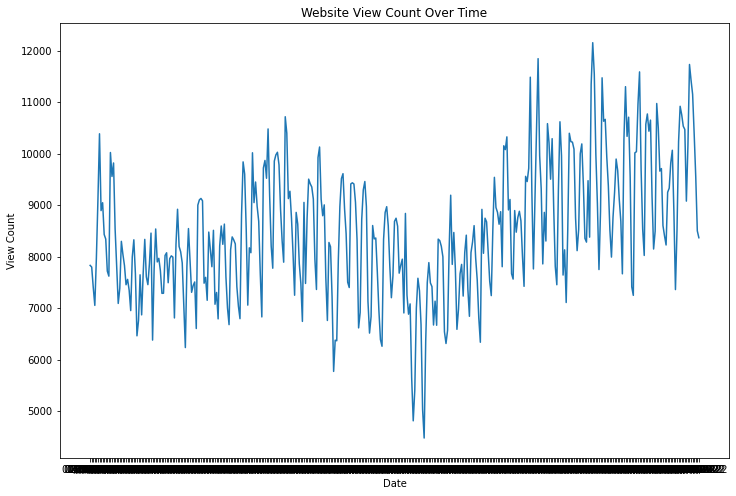

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(website_data['Date'], website_data['Views'])
plt.xlabel('Date')
plt.ylabel('View Count')
plt.title('Website View Count Over Time')
plt.show()

In [ ]:
website_data['Date'] = pd.to_datetime(website_data['Date'],format="%d/%m/%Y")
website_data.set_index('Date', inplace=True)

In [ ]:
website_data['year'] = website_data.index.year
website_data['month'] = website_data.index.month
website_data['day'] = website_data.index.day
website_data['weekday'] = website_data.index.weekday
website_data

,Views,year,month,day,weekday
Date,,,,,
2021-06-01,7831,2021,6,1,1
2021-06-02,7798,2021,6,2,2
2021-06-03,7401,2021,6,3,3
2021-06-04,7054,2021,6,4,4
2021-06-05,7973,2021,6,5,5
...,...,...,...,...,...
2022-06-22,11154,2022,6,22,2
2022-06-23,10382,2022,6,23,3
2022-06-24,9555,2022,6,24,4


In [ ]:
X = website_data[['year', 'month', 'day', 'weekday']]
y = website_data['Views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# model = LinearRegression()
# model.fit(X_train, y_train)

In [ ]:
# model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
# model.fit(X_train, y_train)

Using different models RandomForest model provides the best value in rmse for the given data

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
test_predictions = model.predict(X_test)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 688.0866881552467


In [ ]:
future_Dates = pd.date_range(start='2023-04-01', end='2023-04-30')
future_data = pd.DataFrame({'Date': future_Dates})
future_data['year'] = future_data['Date'].dt.year
future_data['month'] = future_data['Date'].dt.month
future_data['day'] = future_data['Date'].dt.day
future_data['weekday'] = future_data['Date'].dt.weekday

In [ ]:
future_predictions = model.predict(future_data[['year', 'month', 'day', 'weekday']])
print('Future View Count Predictions:', future_predictions)

Future View Count Predictions: [ 7354.42  7785.    9334.57 10125.18 10109.14  9727.69  8904.91  8094.45
  8060.28 10467.57 10338.66 10081.73  9018.1   8689.37  8117.12  8907.91
 10425.27 11318.66 11410.3  10403.37  9058.96  8572.55  8430.98 11176.32
 11018.66 10701.82 10349.65  9248.85  8472.63  8341.46]


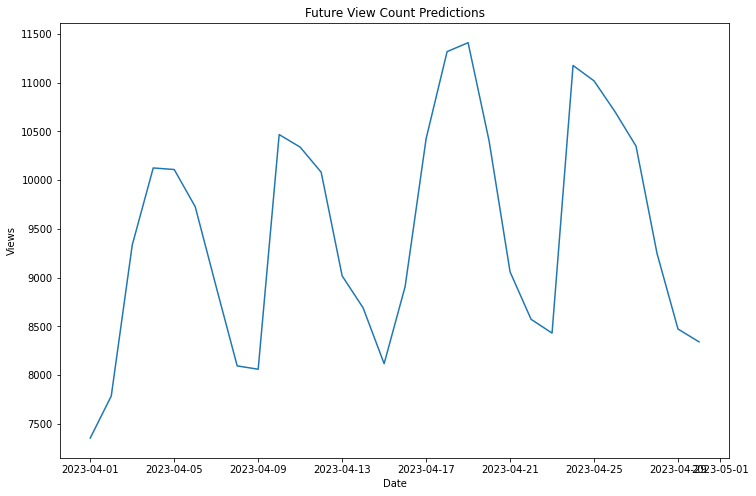

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(future_Dates, future_predictions)
plt.title('Future View Count Predictions')

plt.xlabel('Date')
plt.ylabel('Views')
plt.show()